In [254]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter 

In [255]:
style.use('fivethirtyeight')

In [256]:
classes={'class1':'orange','class2':'blue'}

In [257]:
dataset={classes['class1']:[[4,2],[2,4],[6,4],[4,6]],classes['class2']:[[4,4],[6,2]]}

In [258]:
dataset

{'orange': [[4, 2], [2, 4], [6, 4], [4, 6]], 'blue': [[4, 4], [6, 2]]}

In [259]:
pt_shape={classes['class1']:',',classes['class2']:'o'}

In [260]:
pt_shape

{'orange': ',', 'blue': 'o'}

In [261]:
predict=[6,6]

In [262]:
def k_nearest_neighbors(data,predict,k=3):
    distances=[]
    for group in data:
        for point in data[group]:
            euclidean_dist=np.linalg.norm(np.array(point)-np.array(predict))
            distances.append([euclidean_dist,group])
            
    votes=[i[1] for i in sorted(distances)[:k]] 
    #sorted sorts the list of list using item at 0 index i.e. euclidean_dist
    #i[1] will store group as distance becomes irrelavent in sorted list
    vote_result=Counter(votes).most_common(1)[0][0]
    
    return vote_result

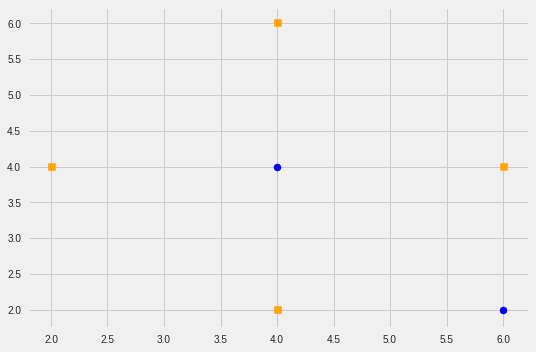

In [263]:
#SINLE LINE FOR LOOP CANT BE IMPLEMENTED FOR ASSIGNMENT OPERATIONS
#USE IT FOR SINGLE LINE NON ASSIGNING STATEMENTS ONLY LIKE GIVEN BELOW
[[plt.scatter(point[0],point[1],color=group,marker=pt_shape[group]) for point in dataset[group]] for group in dataset]
plt.show()

In [264]:
group=k_nearest_neighbors(dataset,predict,k=3)
print(predict)
print(group)

[6, 6]
orange


[]

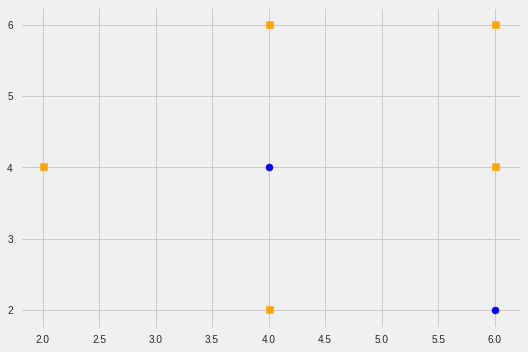

In [265]:
[[plt.scatter(point[0],point[1],color=group,marker=pt_shape[group]) for point in dataset[group]] for group in dataset]
plt.scatter(predict[0],predict[1],color=group,marker=pt_shape[group])
plt.plot()

In [266]:
#weighted KNN

In [267]:
def weight_function(dist):
    weight=round((1/dist),2)
    return weight
    

In [268]:
def get_highest_wt_group(votes):
    wt_class1=0;wt_class2=0
    for group in votes:
        if group[0]==classes['class1']:
            wt_class1+=group[1]
        elif group[0]==classes['class2']:
            wt_class2+=group[1]

    print(f"weight of classes {classes['class1']} {wt_class1} , {classes['class2']} {wt_class2}")
    
    if wt_class1>wt_class2:
          return classes['class1']
    elif wt_class1<=wt_class2:
          return classes['class2']
          
    


In [269]:
def weighted_k_nearest_neighbors(data,predict,k=3):
    distances=[]
    for group in data:
        for point in data[group]:
            euclidean_dist=np.linalg.norm(np.array(point)-np.array(predict))
            weight=weight_function(euclidean_dist)
            distances.append([euclidean_dist,group,weight])
            
    votes=[[i[1],i[2]] for i in sorted(distances)[:k]]
    
    vote_result=get_highest_wt_group(votes)
    
    return vote_result

In [270]:
group=weighted_k_nearest_neighbors(dataset,predict,3)
print(predict)
print(group)

weight of classes orange 1.0 , blue 0.35
[6, 6]
orange


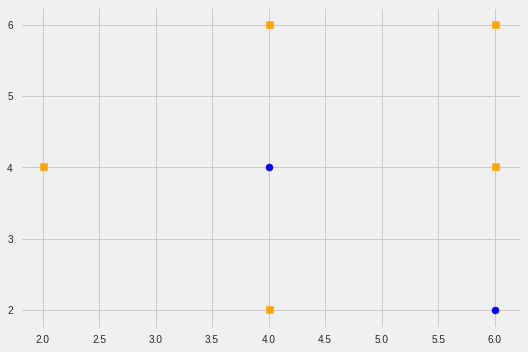

In [271]:
[[plt.scatter(point[0],point[1],color=group,marker=pt_shape[group]) for point in dataset[group]] for group in dataset]
plt.scatter(predict[0],predict[1],color=group,marker=pt_shape[group])
plt.show()